# SORU 2

`2.` **Ekli data üzerindeki aşağıda yer alan kolonların count, mean, std, min, 25%, 50%, 75%, max değerlerini ve IQR metoduyla outlier kalan veri sayısını çıkartıp, bu değerleri sözel ve karşılaştırmalı olarak yorumlayalım.**

In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:
# Verilen .csv dosyası .read_csv() metoduyla okundu.

df = pd.read_csv("data.csv")
df.head()

id diagnosis  ...  fractal_dimension_worst  Unnamed: 32
0    842302         M  ...                  0.11890          NaN
1    842517         M  ...                  0.08902          NaN
2  84300903         M  ...                  0.08758          NaN
3  84348301         M  ...                  0.17300          NaN
4  84358402         M  ...                  0.07678          NaN

[5 rows x 33 columns]

In [ ]:
# Datamızdaki eksik verileri listelendi.

df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [ ]:
# .drop metoduyla gereksiz kolonlardan arındırıldı.

df = df.drop(["Unnamed: 32","id"],axis=1)
df.head()

diagnosis  radius_mean  ...  symmetry_worst  fractal_dimension_worst
0         M        17.99  ...          0.4601                  0.11890
1         M        20.57  ...          0.2750                  0.08902
2         M        19.69  ...          0.3613                  0.08758
3         M        11.42  ...          0.6638                  0.17300
4         M        20.29  ...          0.2364                  0.07678

[5 rows x 31 columns]

In [ ]:
# Datamız ilgilendiğimiz kısma göre filtrelendi.

data_B = df[df.diagnosis == "B"].iloc[:,[1,4,6]]
data_B.head()

radius_mean  area_mean  compactness_mean
19       13.540      566.3           0.08129
20       13.080      520.0           0.12700
21        9.504      273.9           0.06492
37       13.030      523.8           0.03766
46        8.196      201.9           0.05943

In [ ]:
# diagnosis == B için ilgilenilen kolonların istatistiksel değerleri

data_B.describe().T

count        mean         std  ...        50%        75%       max
radius_mean       357.0   12.146524    1.780512  ...   12.20000   13.37000   17.8500
area_mean         357.0  462.790196  134.287118  ...  458.40000  551.10000  992.1000
compactness_mean  357.0    0.080085    0.033750  ...    0.07529    0.09755    0.2239

[3 rows x 8 columns]

In [ ]:
# Datamız ilgilendiğimiz kısma göre filtrelendi.

data_M = df[df.diagnosis == "M"].iloc[:,[1,4,6]]
data_M.head()

radius_mean  area_mean  compactness_mean
0        17.99     1001.0           0.27760
1        20.57     1326.0           0.07864
2        19.69     1203.0           0.15990
3        11.42      386.1           0.28390
4        20.29     1297.0           0.13280

In [ ]:
# diagnosis == M için ilgilenilen kolonların istatistiksel değerleri

data_M.describe().T

count        mean  ...        75%        max
radius_mean       212.0   17.462830  ...    19.5900    28.1100
area_mean         212.0  978.376415  ...  1203.7500  2501.0000
compactness_mean  212.0    0.145188  ...     0.1724     0.3454

[3 rows x 8 columns]

## diagnosis == "B"

### "radius_mean" Kolonu

In [ ]:
# diagnosis == "B" için radius_mean kolonu

radius_mean = data_B.radius_mean.describe()
radius_mean

count    357.000000
mean      12.146524
std        1.780512
min        6.981000
25%       11.080000
50%       12.200000
75%       13.370000
max       17.850000
Name: radius_mean, dtype: float64

In [ ]:
# Outlier verileri bulmak için alt ve üst sınırların belirlenmesi

Q1 = radius_mean[4]
Q3 = radius_mean[6]
IQR = Q3 - Q1

print(f"IQR: {IQR}\n")

upper = Q3 + (1.5 * IQR) # üst sınır
lower = Q1 - (1.5 * IQR) # alt sınır

print(f"Alt Sınır : {lower}\n")
print(f"Üst Sınır : {upper}\n")

# Outlier verilerin listelenmesi

print("Outliers:\n " , data_B[(data_B["radius_mean"] > upper) | (data_B["radius_mean"] < lower) ].radius_mean.values)


IQR: 2.289999999999999

Alt Sınır : 7.645000000000001

Üst Sınır : 16.805

Outliers:
  [ 6.981 16.84  17.85 ]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


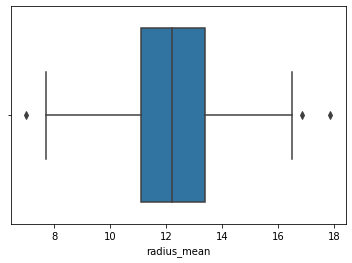

In [ ]:
# BoxPlot ile sınırları ve outlier verileri görebiliriz.

sns.boxplot(data_B.radius_mean)

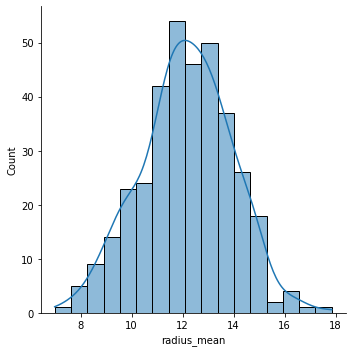

In [ ]:
#DistPlot ile değişkenimizin dağılımını görebiliriz.

sns.displot(data_B.radius_mean, kde=True)

### "area_mean" Kolonu

In [ ]:
# diagnosis == "B" için area_mean kolonu

area_mean = data_B.area_mean.describe()
area_mean

count    357.000000
mean     462.790196
std      134.287118
min      143.500000
25%      378.200000
50%      458.400000
75%      551.100000
max      992.100000
Name: area_mean, dtype: float64

In [ ]:
# Outlier verileri bulmak için alt ve üst sınırların belirlenmesi

Q1 = area_mean[4]
Q3 = area_mean[6]
IQR = Q3 - Q1

print(f"IQR: {IQR}\n")

upper = Q3 + (1.5 * IQR) # üst sınır
lower = Q1 - (1.5 * IQR) # alt sınır

print(f"Alt Sınır : {lower}\n")
print(f"Üst Sınır : {upper}\n")

# Outlier verilerin listelenmesi
print("Outliers:\n " , data_B[(data_B["area_mean"] > upper) | (data_B["area_mean"] < lower) ].area_mean.values)


IQR: 172.90000000000003

Alt Sınır : 118.84999999999997

Üst Sınır : 810.45

Outliers:
  [880.2 838.1 992.1 819.8]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


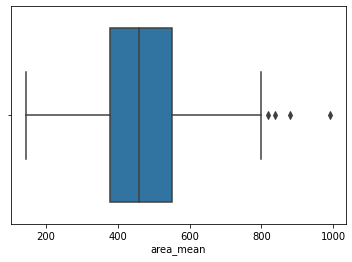

In [ ]:
# BoxPlot ile sınırları ve outlier verileri görebiliriz.

sns.boxplot( data_B.area_mean)

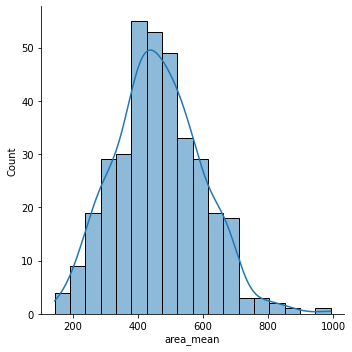

In [ ]:
## DistPlot ile değişkenimizin dağılımını görebiliriz.
sns.displot(data_B.area_mean, kde=True)

### "compactness_mean"

In [ ]:
# diagnosis == "B" için compactness_mean kolonu

compactness_mean = data_B.compactness_mean.describe()
compactness_mean

count    357.000000
mean       0.080085
std        0.033750
min        0.019380
25%        0.055620
50%        0.075290
75%        0.097550
max        0.223900
Name: compactness_mean, dtype: float64

In [ ]:
# Outlier verileri bulmak için alt ve üst sınırların belirlenmesi

Q1 = compactness_mean[4]
Q3 = compactness_mean[6]
IQR = Q3 - Q1

print(f"IQR: {IQR}\n")

upper = Q3 + (1.5 * IQR) # üst sınır
lower = Q1 - (1.5 * IQR) # alt sınır

print(f"Alt Sınır : {lower}\n")
print(f"Üst Sınır : {upper}\n")

# Outlier verilerin listelenmesi
print("Outliers:\n " , data_B[(data_B["compactness_mean"] > upper) | (data_B["compactness_mean"] < lower) ].compactness_mean.values)


IQR: 0.041929999999999995

Alt Sınır : -0.00727499999999999

Üst Sınır : 0.160445

Outliers:
  [0.2233 0.1807 0.1676 0.1972 0.166  0.1836 0.2239 0.2204 0.1661]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


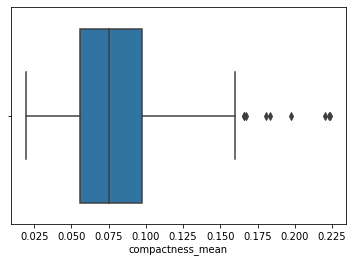

In [ ]:
# BoxPlot ile sınırları ve outlier verileri görebiliriz.

sns.boxplot(data_B.compactness_mean)

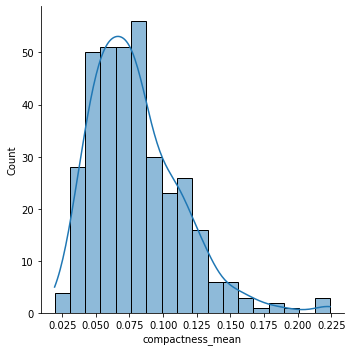

In [ ]:
## DistPlot ile değişkenimizin dağılımını görebiliriz.
sns.displot(data_B.compactness_mean, kde=True)

## diagnosis == "M"

### "radius_mean" Kolonu

In [ ]:
# diagnosis == "M" için radius_mean kolonu

radius_mean = data_M.radius_mean.describe()
radius_mean

count    212.000000
mean      17.462830
std        3.203971
min       10.950000
25%       15.075000
50%       17.325000
75%       19.590000
max       28.110000
Name: radius_mean, dtype: float64

In [ ]:
# Outlier verileri bulmak için alt ve üst sınırların belirlenmesi

Q1 = radius_mean[4]
Q3 = radius_mean[6]
IQR = Q3 - Q1

print(f"IQR: {IQR}\n")

upper = Q3 + (1.5 * IQR) # üst sınır
lower = Q1 - (1.5 * IQR) # alt sınır

print(f"Alt Sınır : {lower}\n")
print(f"Üst Sınır : {upper}\n")

# Outlier verilerin listelenmesi

print("Outliers:\n " , data_M[(data_M["radius_mean"] > upper) | (data_M["radius_mean"] < lower) ].radius_mean.values)

IQR: 4.514999999999999

Alt Sınır : 8.302500000000002

Üst Sınır : 26.362499999999997

Outliers:
  [27.22 28.11 27.42]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


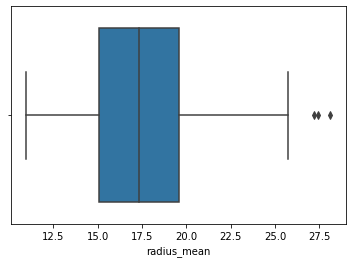

In [ ]:
# BoxPlot ile sınırları ve outlier verileri görebiliriz.

sns.boxplot(data_M.radius_mean)

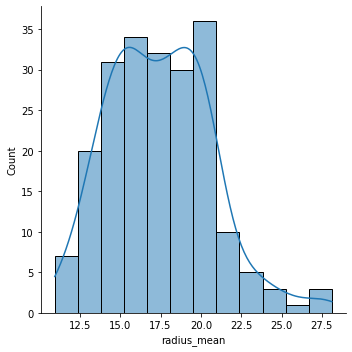

In [ ]:
## DistPlot ile değişkenimizin dağılımını görebiliriz.
sns.displot(data_M.radius_mean, kde=True)

### "area_mean" Kolonu

In [ ]:
# diagnosis == "M" için area_mean kolonu

area_mean = data_M.area_mean.describe()
area_mean

count     212.000000
mean      978.376415
std       367.937978
min       361.600000
25%       705.300000
50%       932.000000
75%      1203.750000
max      2501.000000
Name: area_mean, dtype: float64

In [ ]:
# Outlier verileri bulmak için alt ve üst sınırların belirlenmesi

Q1 = area_mean[4]
Q3 = area_mean[6]
IQR = Q3 - Q1

print(f"IQR: {IQR}\n")

upper = Q3 + (1.5 * IQR) # üst sınır
lower = Q1 - (1.5 * IQR) # alt sınır

print(f"Alt Sınır : {lower}\n")
print(f"Üst Sınır : {upper}\n")

# Outlier verilerin listelenmesi

print("Outliers:\n " , data_M[(data_M["area_mean"] > upper) | (data_M["area_mean"] < lower) ].area_mean.values)


IQR: 498.44999999999993

Alt Sınır : -42.374999999999886

Üst Sınır : 1951.425

Outliers:
  [2250. 2499. 2010. 2501.]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


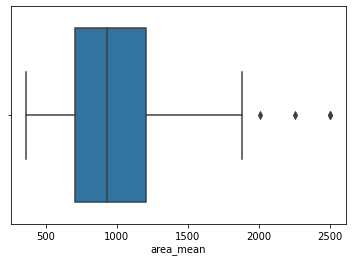

In [ ]:
## BoxPlot ile sınırları ve outlier verileri görebiliriz.
sns.boxplot(data_M.area_mean)

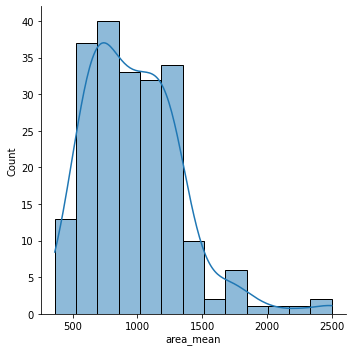

In [ ]:
### DistPlot ile değişkenimizin dağılımını görebiliriz.
sns.displot(data_M.area_mean, kde=True)

### "compactness_mean" Kolonu

In [ ]:
# diagnosis == "M" için compactness_mean kolonu

compactness_mean = data_M.compactness_mean.describe()
compactness_mean

count    212.000000
mean       0.145188
std        0.053987
min        0.046050
25%        0.109600
50%        0.132350
75%        0.172400
max        0.345400
Name: compactness_mean, dtype: float64

In [ ]:
# Outlier verileri bulmak için alt ve üst sınırların belirlenmesi

Q1 = compactness_mean[4]
Q3 = compactness_mean[6]
IQR = Q3 - Q1

print(f"IQR: {IQR}\n")

upper = Q3 + (1.5 * IQR) # üst sınır
lower = Q1 - (1.5 * IQR) # alt sınır

print(f"Alt Sınır : {lower}\n")
print(f"Üst Sınır : {upper}\n")

# Outlier verilerin listelenmesi
print("Outliers:\n " , data_M[(data_M["compactness_mean"] > upper) | (data_M["compactness_mean"] < lower) ].compactness_mean.values)


IQR: 0.06280000000000001

Alt Sınır : 0.015399999999999983

Üst Sınır : 0.2666

Outliers:
  [0.2776 0.2839 0.3454 0.2768 0.2867 0.2832 0.3114 0.277 ]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


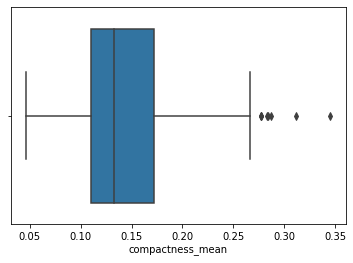

In [ ]:
# # BoxPlot ile sınırları ve outlier verileri görebiliriz.
sns.boxplot(data_M.compactness_mean)

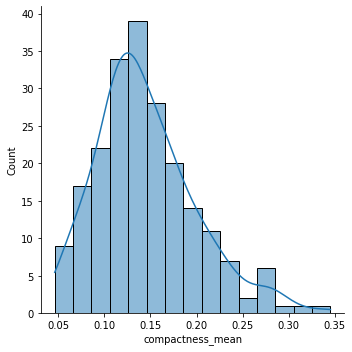

In [ ]:
### DistPlot ile değişkenimizin dağılımını görebiliriz.

sns.displot(data_M.compactness_mean, kde=True)

## Sonuç

Ana datamı `"diagnosis"` kolonuna göre ayırıp, birbiriyle benzer değerlerden oluşan gruplar içerisinde outlier değerleri bulmayı tercih ettim.

Elde ettiğim sonuçlara göre;  

`"diagnosis == 'B' "` için;

*   **"radius_mean"** kolonunda 3,
*   **"area_mean"** kolonunda 4,
*   **"compactness_mean"** kolonunda 9

`"diagnosis == 'M'"` için;  

*   **"radius_mean"** kolonunda 3,
*   **"area_mean"** kolonunda 4,
*   **"compactness_mean"** kolonunda 8 adet outlier veri var.



Bulduğumuz bu aykırı değerler için önemli veya önemsiz olarak yorum yapamayız. Bu aykırı değerler insan hatasından, örnekleme hatalarından, yanlış raporlamadan vb. kaynaklanabilirler. Aykırı değerlerimiz bize normal verilerin vermediği önemli bilgileri veriyorsa bu değerler aykırı olmasına rağmen oldukça önemlidir. Eğer bu aykırı değerler bizlere yanlış bilgi aktarıyorsa önemsiz olarak kabul edebiliriz.

Örneğin;  
1929 yılında Dr. Fredrick McKay'ın tedavi ettiği bir grup hasta nüfusun geri kalanından farklıydı. Bu hastaların diş minelerinde kahverengi benekler vardı. Bu benekler sayesinde bu hastaların dişleri çürümeye karşı dayanıklıydı. Dr. Fredrick McKay, bu hastalar üzerinde yaptığı çalışmalar sonucunda Florürün diş çürümesine karşı koruma sağladığını keşfetmiştir.

[Dr. Fredric McKay](https://www.psychologytoday.com/us/blog/singular-perspective/202102/the-importance-outliers)



---





* En fazla outlier values her iki sınıf içinde (diagnosis == "B" ve diagnosis == "M") `"compactness_mean"` kolonunda olduğundan dolayı bu değerler istatistiksel sonuçlar üzerinde diğer kolonlara oranla daha fazla bozulmaya neden olur.

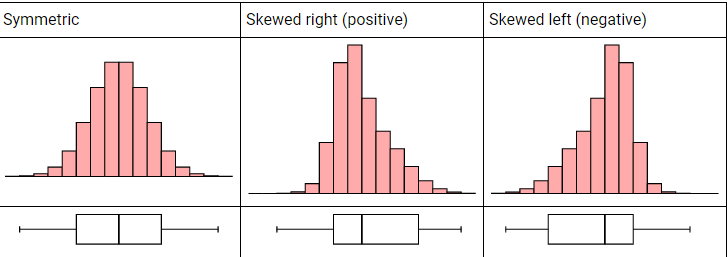
[Symmetric and skewed data](https://intl.siyavula.com/read/maths/grade-11/statistics/11-statistics-05)











* `diagnosis == "B"` için grafikleri incelediğimde;


> "radius_mean" kolonu için "mean" ve "median" değerleri birbirine oldukça yakın ve "median" değeri grafiği yaklaşık olarak iki eş parçaya böldüğü için normal dağılıma yakın diyebiliriz.


> "area_mean" kolonu için "mean" değeri "median" değerinden büyük ve "median" değerine göre sağ kuyruk sol kuyruktan uzun olduğu için pozitif çarpık durumuna yakın diyebiliriz. 

> "compactness_mean" kolonu için "mean" değeri "median" değerinden büyük ve "median" değerine göre sağ kuyruk sol kuyruktan uzun olduğu için pozitif çarpık durumuna yakın diyebiliriz.


* `diagnosis == "M"` için grafikleri incelediğimde;

> "radius_mean" kolonu için "mean" değeri "median" değerinden büyük ve "median" değerine göre sağ kuyruk sol kuyruktan daha uzun olduğu için pozitif çarpık durumuna yakın diyebiliriz.


> "area_mean" kolonu için "mean" değeri "median" değerinden büyük ve "median" değerine göre sağ kuyruk sol kuyruktan uzun olduğu için pozitif çarpık durumuna yakın diyebiliriz. 


> "compactness_mean" kolonu için "mean" değeri "median" değerinden büyük ve "median" değerine göre sağ kuyruk sol kuyruktan uzun olduğu için pozitif çarpık durumuna yakın diyebiliriz.

---

* Hücrelere bakarak "diagnosis" kolonu için bir model kurduğumuzu varsayalım;

> Genel olarak "radius_mean, area_mean, compactness_mean" hücrelerine baktığımızda hepsi pozitif çarpık durumuna yakın diyebiliriz. Yani daha düşük değere sahip daha fazla veri noktası vardır. Bu yüzden modelimizi bu veriler ile eğittiğimizde daha düşük "radius_mean, area_mean, "compactness_mean" değerlerine sahip hücrelerin teşhisini daha yüksek "radius_mean, area_mean, compactness_mean" değerlerine sahip hücrelere kıyasla daha doğru yapabilir diyebiliriz.